# Suction Anchor Capacity – Jupyter Notebook

### Step 1: Import required libraries

We begin by importing the essential modules:

- `Anchor` from `famodel.anchors.anchor`: the main class that encapsulates the suction anchor's capacity methods - soil properties, anchor geometry and extreme loads.
- `plot_suction` from `famodel.anchors.anchors_famodel.capacity_plots`: a custom plotting utility that visualizes anchor geometry and soil properties.

These imports set up the environment to define, simulate, and visualize the anchor system.

In [4]:
from famodel.anchors.anchor import Anchor
from famodel.anchors.anchors_famodel.support_plots import plot_suction

ModuleNotFoundError: No module named 'famodel'

### Step 2: Define the layered soil profile map
We create a list of CPT locations in the vertices of a 500x500 m square within the Lease Area, each with a set of layered clay soil parameters.

In [ ]:
profile_map = [
    {
        'name': 'CPT_A1',
        'x': 0.0, 'y': 0.0,
        'layers': [
            {'top':  2.0, 'bottom':  4.0, 'soil_type': 'clay', 'gamma_top': 8.0, 'gamma_bot': 8.5, 'Su_top':  10, 'Su_bot':  25},
            {'top':  4.0, 'bottom':  6.0, 'soil_type': 'clay', 'gamma_top': 8.5, 'gamma_bot': 9.0, 'Su_top':  25, 'Su_bot':  50},
            {'top':  6.0, 'bottom': 16.0, 'soil_type': 'clay', 'gamma_top': 9.0, 'gamma_bot': 9.5, 'Su_top':  50, 'Su_bot': 100},
            {'top': 16.0, 'bottom': 25.0, 'soil_type': 'clay', 'gamma_top': 9.5, 'gamma_bot': 9.5, 'Su_top': 100, 'Su_bot': 100}
        ]
    },
    {
        'name': 'CPT_B1',
        'x': 500.0, 'y': 0.0,
        'layers': [
            {'top':  2.0, 'bottom':  4.0, 'soil_type': 'clay', 'gamma_top':  8.5, 'gamma_bot':  9.0, 'Su_top':  15, 'Su_bot':  30},
            {'top':  4.0, 'bottom':  6.0, 'soil_type': 'clay', 'gamma_top':  9.0, 'gamma_bot':  9.5, 'Su_top':  30, 'Su_bot':  55},
            {'top':  6.0, 'bottom': 16.0, 'soil_type': 'clay', 'gamma_top':  9.5, 'gamma_bot': 10.0, 'Su_top':  55, 'Su_bot': 105},
            {'top': 16.0, 'bottom': 25.0, 'soil_type': 'clay', 'gamma_top': 10.0, 'gamma_bot': 10.0, 'Su_top': 105, 'Su_bot': 105}
        ]
    },
    {
        'name': 'CPT_A2',
        'x': 0.0, 'y': 500.0,
        'layers': [
            {'top':  2.0, 'bottom':  4.0, 'soil_type': 'clay', 'gamma_top': 7.5, 'gamma_bot': 8.0, 'Su_top':  5, 'Su_bot': 20},
            {'top':  4.0, 'bottom':  8.0, 'soil_type': 'clay', 'gamma_top': 8.0, 'gamma_bot': 8.5, 'Su_top': 20, 'Su_bot': 45},
            {'top':  8.0, 'bottom': 16.0, 'soil_type': 'clay', 'gamma_top': 8.5, 'gamma_bot': 9.0, 'Su_top': 45, 'Su_bot': 95},
            {'top': 16.0, 'bottom': 25.0, 'soil_type': 'clay', 'gamma_top': 9.0, 'gamma_bot': 9.0, 'Su_top': 95, 'Su_bot': 95}
        ]
    },
    {
        'name': 'CPT_B2',
        'x': 500.0, 'y': 500.0,
        'layers': [
            {'top':  1.0, 'bottom':  2.0, 'soil_type': 'clay', 'gamma_top':  9.0, 'gamma_bot':  9.5, 'Su_top':  20, 'Su_bot':  35},
            {'top':  2.0, 'bottom':  8.0, 'soil_type': 'clay', 'gamma_top':  9.5, 'gamma_bot': 10.0, 'Su_top':  35, 'Su_bot':  60},
            {'top':  8.0, 'bottom': 16.0, 'soil_type': 'clay', 'gamma_top': 10.0, 'gamma_bot': 10.5, 'Su_top':  60, 'Su_bot': 110},
            {'top': 16.0, 'bottom': 25.0, 'soil_type': 'clay', 'gamma_top': 10.5, 'gamma_bot': 10.5, 'Su_top': 110, 'Su_bot': 110}
        ]
    }
]

### Step 3: Initialize the anchor object
We define a suction anchor with its type, initial geometry and anchor location within the defined area.

In [ ]:
anchor = Anchor(
    dd = {'type': 'suction', 'design': {'D': 2.5, 'L': 12.0, 'zlug': 8.67}},
    r = [250.0, 250.0, 0.0]
)

### Step 4: Assign soil profile to anchor location
This connects the anchor object to the appropriate CPT soil data based on proximity.

In [ ]:
anchor.interpolateSoilProfile(profile_map)

[Anchor] Interpolated soil profile: Interpolated_2D with soil types ['clay']


### Step 5: Plot suction anchor and soil profile
We represent a suction anchor embedded in the soil.

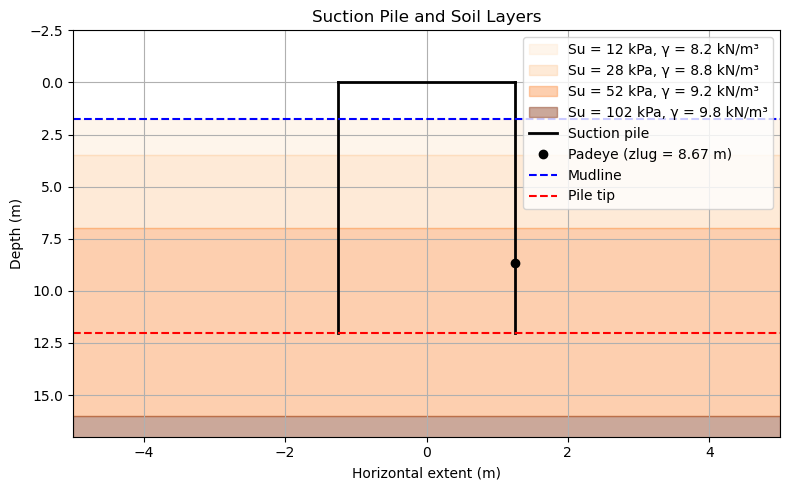

In [ ]:
# Access anchor geometrical properties
L = anchor.dd['design']['L']
D = anchor.dd['design']['D']
zlug = anchor.dd['design']['zlug']
# Access matched profile
layers = anchor.soil_profile
z0 = layers[0]['top']  

plot_suction(layers, L=L, D=D, z0=z0, zlug=zlug, title='Suction Pile and Soil Layers')

### Step 6: Assign external loads and line properties
We assign horizontal and vertical loads and specify the mooring line type and its physical properties (nominal diameter and weight (N/m)).

In [ ]:
anchor.loads = {
    'Hm': 3e6,
    'Vm': 2e6
}
anchor.line_type = 'chain'
anchor.d = 0.16
anchor.w = 5000.0
print('Initial mass from dd:', anchor.dd['design'].get('mass', 'Not defined'))

Initial mass from dd: Not defined


### Step 7: Compute lug forces
We compute the forces acting at the lug using load, geometry, and soil interaction. 

Input Tm = 3605551.2754639895, thetam = 33.690067525979785, zlug = 8.67
Output Hm = 3000000.0000000005, Vm = 1999999.9999999998
Output Ta = 3375980.0732258284, thetaa = 55.648978744279006
Output Ha = 1904935.434154513, Va = 2787196.1621888806


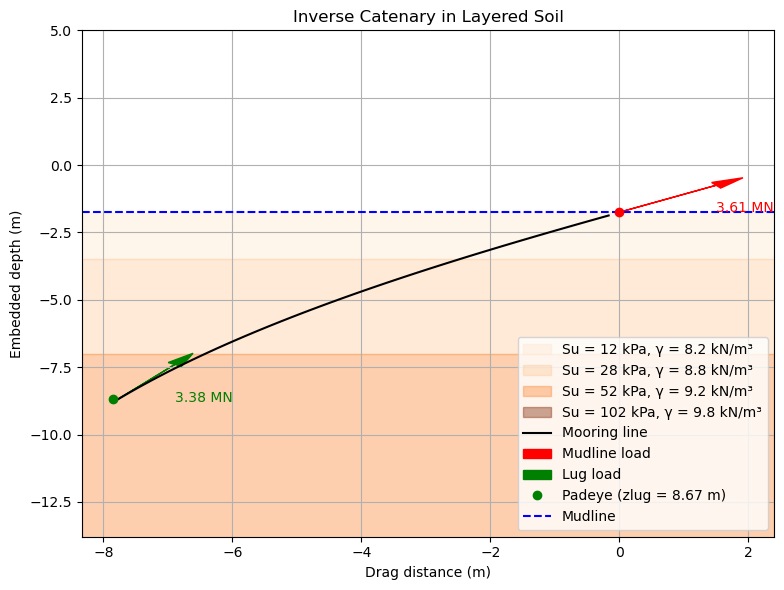


Lug Forces Computed:
Ha = 1904935.43 N
Va = 2787196.16 N


In [ ]:
layers, Ha, Va = anchor.getLugForces(
    Hm = anchor.loads['Hm'],
    Vm = anchor.loads['Vm'],
    zlug = anchor.dd['design']['zlug'],
    line_type = anchor.line_type,
    d = anchor.d,
    w = anchor.w,
    plot = True
)

print('\nLug Forces Computed:')
print(f'Ha = {Ha:.2f} N')
print(f'Va = {Va:.2f} N')

### Step 8: Compute the anchor capacity
This checks whether the current anchor design meets load requirements. Results and plots are printed for reference.

Input Tm = 3605551.2754639895, thetam = 33.690067525979785, zlug = 8.67
Output Hm = 3000000.0000000005, Vm = 1999999.9999999998
Output Ta = 3375980.0732258284, thetaa = 55.648978744279006
Output Ha = 1904935.434154513, Va = 2787196.1621888806
Input Hm = 3000000.0, Vm = 2000000.0, zlug = 8.67
Output Ha = 1904935.4341545128, Va = 2787196.162188881, zlug = 8.67
Output Ta = 3375980.073225829, thetaa = 55.648978744279006
dz_clip  = 1.75 m
ez_layer = 2.74 m
Su_av_z (at ez_layer) = 20960.65 Pa
alphastar   = 0.382
Vmax_layer    = 280523.02 N
Vmax1   = not applicable
Vmax2   = 280523.02 N
Vmax3   = 241917.02 N
dz_clip  = 3.50 m
ez_layer = 5.44 m
Su_av_z (at ez_layer) = 41334.23 Pa
alphastar   = 0.388
Vmax_layer    = 977721.41 N
Vmax1   = not applicable
Vmax2   = 977721.41 N
Vmax3   = 697709.86 N
dz_clip  = 5.00 m
ez_layer = 9.68 m
Su_av_z (at ez_layer) = 67381.35 Pa
alphastar   = 0.381
Vmax_layer    = 4714446.61 N
Vmax1   = 4714446.61 N
Vmax2   = 2131059.03 N
Vmax3   = 1378013.04 N
dz_clip  = -

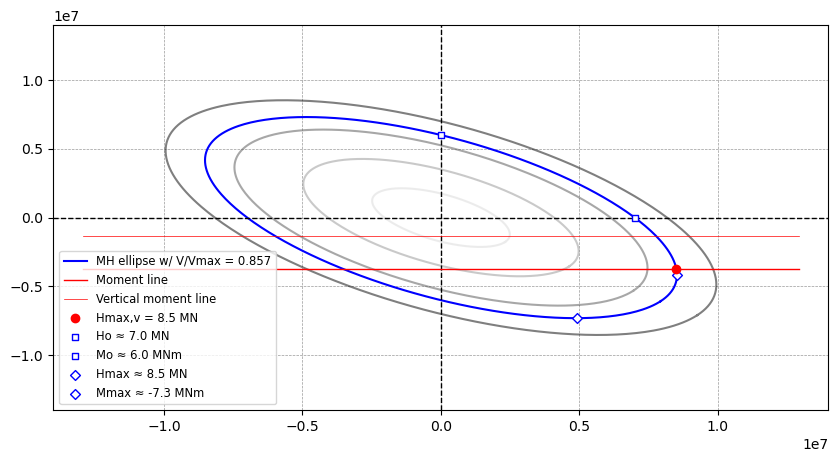

<Figure size 600x500 with 0 Axes>

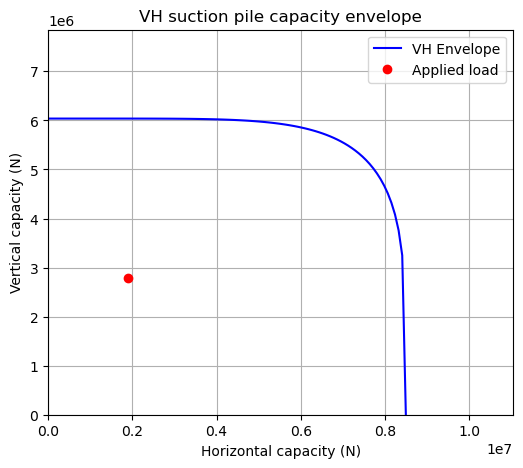


Capacity Results:
Hmax: 8496895.31
Vmax: 6037871.08
Ha: 1904935.43
Va: 2787196.16
zlug: 8.67
z0: 1.75
UC: 0.01
Weight pile: 457496.77
Initial mass from dd: Not defined


In [ ]:
anchor.getCapacityAnchor(
    Hm = anchor.loads['Hm'],
    Vm = anchor.loads['Vm'],
    zlug = anchor.dd['design']['zlug'],
    line_type = anchor.line_type,
    d = anchor.d,
    w = anchor.w,
    plot = True
)

print('\nCapacity Results:')
for key, value in anchor.anchorCapacity.items():
    print(f'{key}: {value:.2f}')
print('Initial mass from dd:', anchor.dd['design'].get('mass', 'Not defined'))

### Step 9: Anchor material costs
We assess the cost of the suction pile defined by the manufacturing cost (USD/kg)

In [ ]:
anchor.getCostAnchor2()

print(f"Mass: {anchor.anchorCapacity['Weight pile']/9.81:.2f} kg")
print(f"Material unit cost: {anchor.cost['unit_cost']:.2f} USD/kg")
print(f'Material cost: {anchor.cost["Material cost"]:.2f} USD [2024]')


AttributeError: 'Anchor' object has no attribute 'getCostAnchor2'

### Step 10: Optimize anchor geometry
We optimize anchor length and diameter to ensure capacity requirements are met efficiently within given bounds. Note that a safety factor (SF_combined) = 2 is used in this optimization process. This means that the unity check (UC = 1/SF) equals 0.5. This way the design can accept some extra capacity based on input preference.

Input Tm = 3605551.2754639895, thetam = 33.690067525979785, zlug = 8.0
Output Hm = 3000000.0000000005, Vm = 1999999.9999999998
Output Ta = 3402770.361024352, thetaa = 52.89170672655495
Output Ha = 2052971.0777319924, Va = 2713697.824714782
Input Hm = 3000000.0, Vm = 2000000.0, zlug = 8.0
Output Ha = 2052971.0777319924, Va = 2713697.824714782, zlug = 8.0
Output Ta = 3402770.361024352, thetaa = 52.89170672655495
dz_clip  = 1.75 m
ez_layer = 2.74 m
Su_av_z (at ez_layer) = 20960.65 Pa
alphastar   = 0.382
Vmax_layer    = 280523.02 N
Vmax1   = not applicable
Vmax2   = 280523.02 N
Vmax3   = 241917.02 N
dz_clip  = 3.50 m
ez_layer = 5.44 m
Su_av_z (at ez_layer) = 41334.23 Pa
alphastar   = 0.388
Vmax_layer    = 977721.41 N
Vmax1   = not applicable
Vmax2   = 977721.41 N
Vmax3   = 697709.86 N
dz_clip  = 5.00 m
ez_layer = 9.68 m
Su_av_z (at ez_layer) = 67381.35 Pa
alphastar   = 0.381
Vmax_layer    = 4714446.61 N
Vmax1   = 4714446.61 N
Vmax2   = 2131059.03 N
Vmax3   = 1378013.04 N
dz_clip  = -4.00 m

c:\code\famodel\famodel\anchors\anchors_famodel_map\capacity_suction_map.py:348: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


pile_head    = 36434.85 N
Vmax_final   = 3836386.95 N
Input Tm = 3605551.2754639895, thetam = 33.690067525979785, zlug = 7.932052105212464
Output Hm = 3000000.0000000005, Vm = 1999999.9999999998
Output Ta = 3408773.728776871, thetaa = 52.2309941857935
Output Ha = 2087804.128469118, Va = 2694589.440925404
Input Hm = 3000000.0, Vm = 2000000.0, zlug = 7.932052105212464
Output Ha = 2087804.128469118, Va = 2694589.440925404, zlug = 7.932052105212464
Output Ta = 3408773.728776871, thetaa = 52.2309941857935
dz_clip  = 1.75 m
ez_layer = 2.74 m
Su_av_z (at ez_layer) = 20960.65 Pa
alphastar   = 0.385
Vmax_layer    = 198416.10 N
Vmax1   = not applicable
Vmax2   = 198416.10 N
Vmax3   = 156512.04 N
dz_clip  = 3.50 m
ez_layer = 5.44 m
Su_av_z (at ez_layer) = 41334.23 Pa
alphastar   = 0.390
Vmax_layer    = 715773.02 N
Vmax1   = not applicable
Vmax2   = 715773.02 N
Vmax3   = 477598.68 N
dz_clip  = 4.90 m
ez_layer = 9.62 m
Su_av_z (at ez_layer) = 67062.26 Pa
alphastar   = 0.381
Vmax_layer    = 2810131.

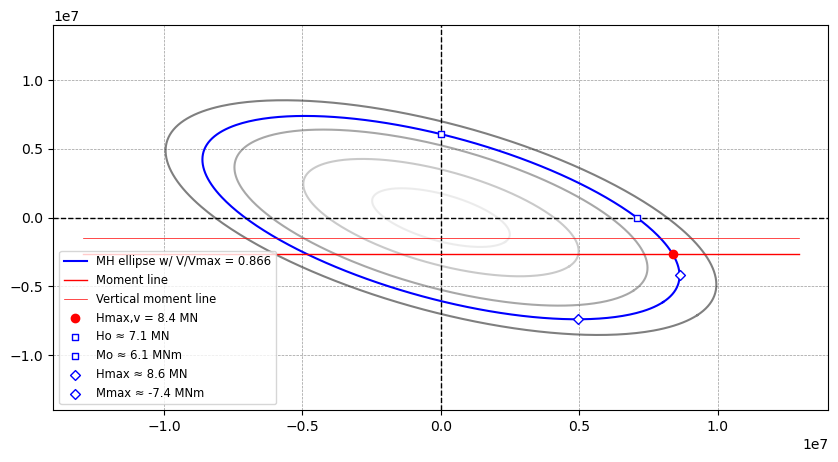

<Figure size 600x500 with 0 Axes>

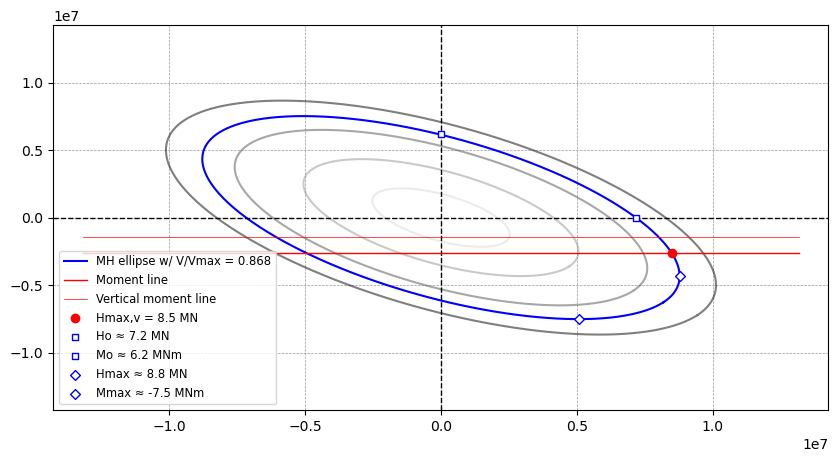

<Figure size 600x500 with 0 Axes>

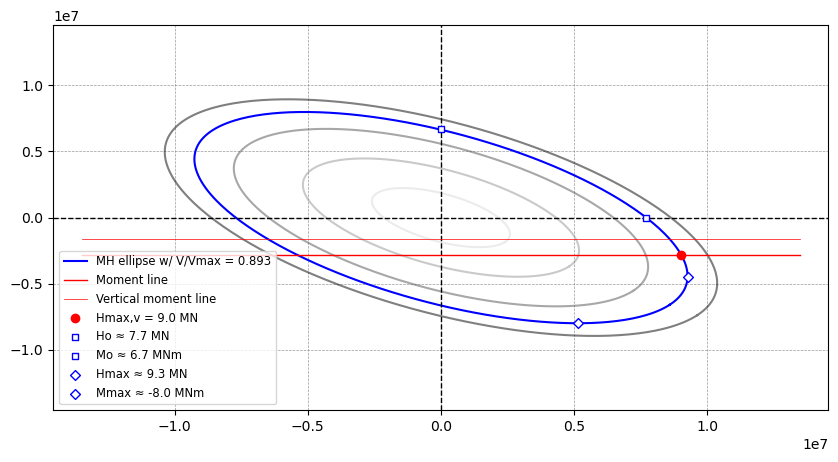

<Figure size 600x500 with 0 Axes>

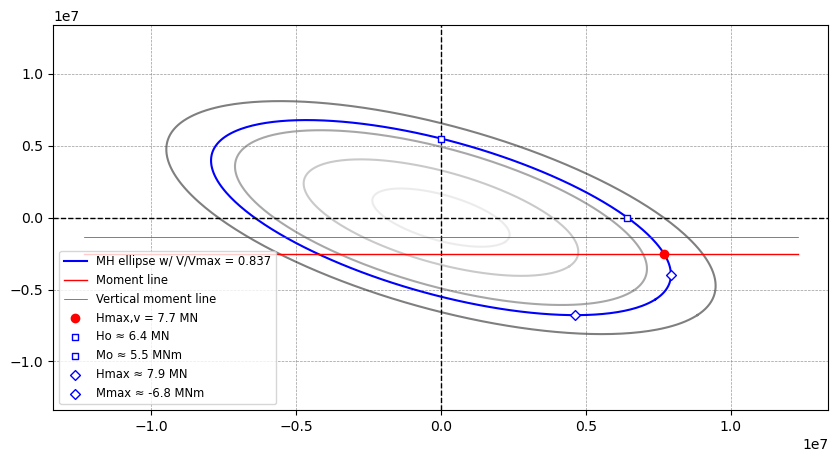

<Figure size 600x500 with 0 Axes>

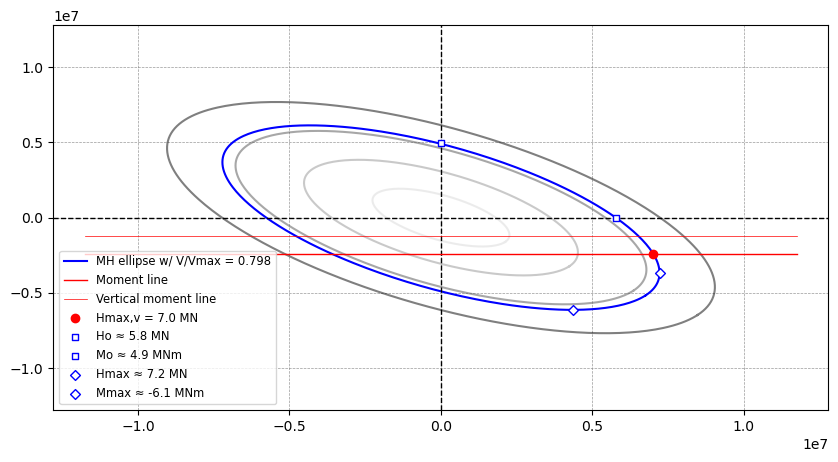

<Figure size 600x500 with 0 Axes>

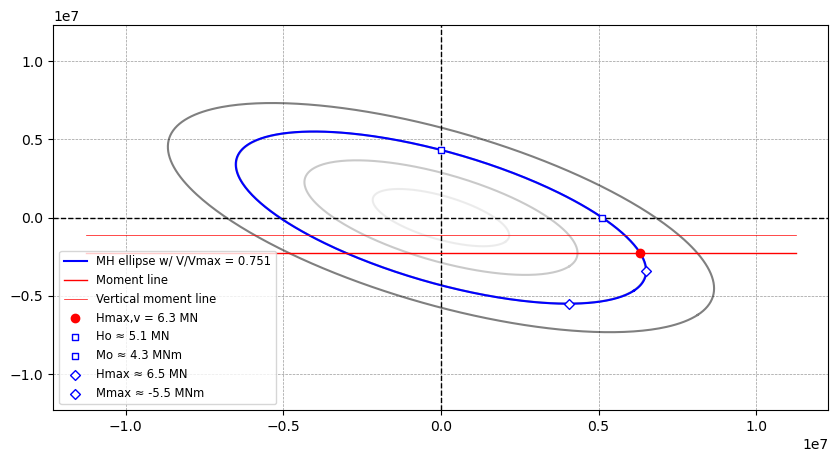

<Figure size 600x500 with 0 Axes>

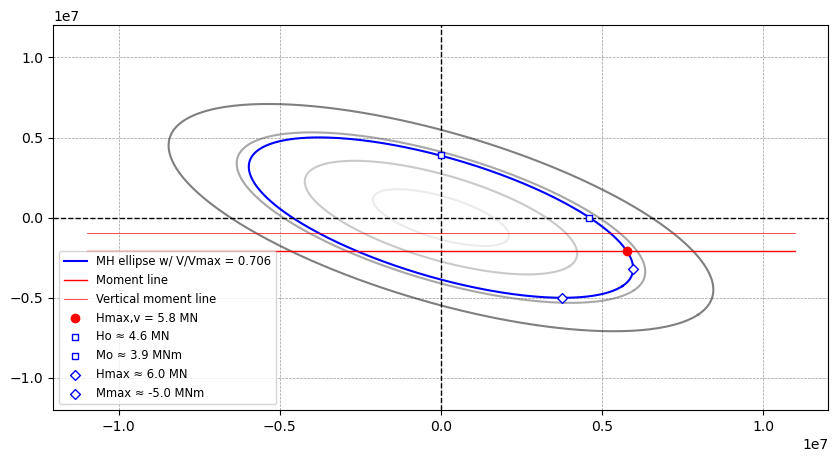

<Figure size 600x500 with 0 Axes>

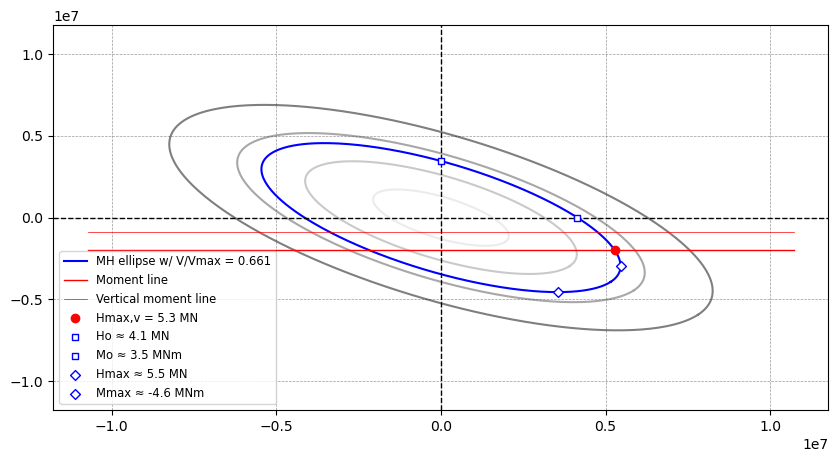

<Figure size 600x500 with 0 Axes>

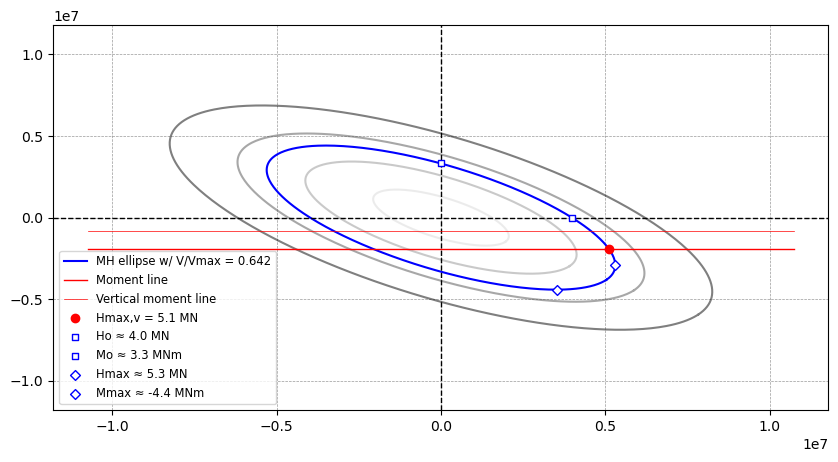

<Figure size 600x500 with 0 Axes>

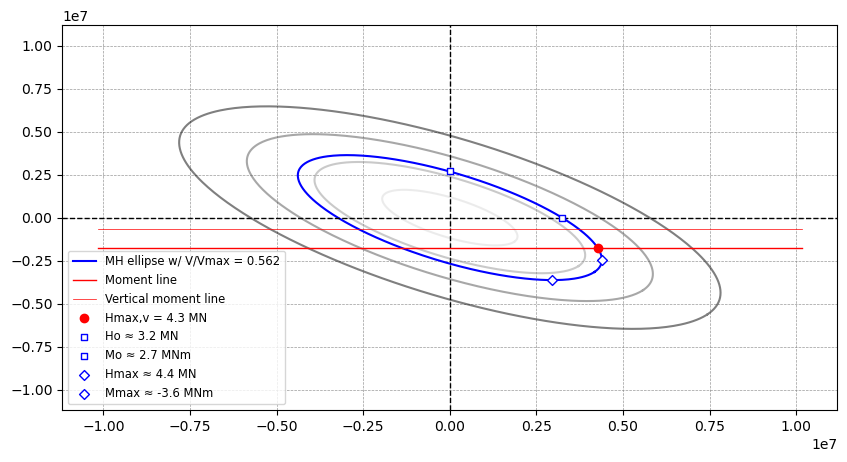

<Figure size 600x500 with 0 Axes>

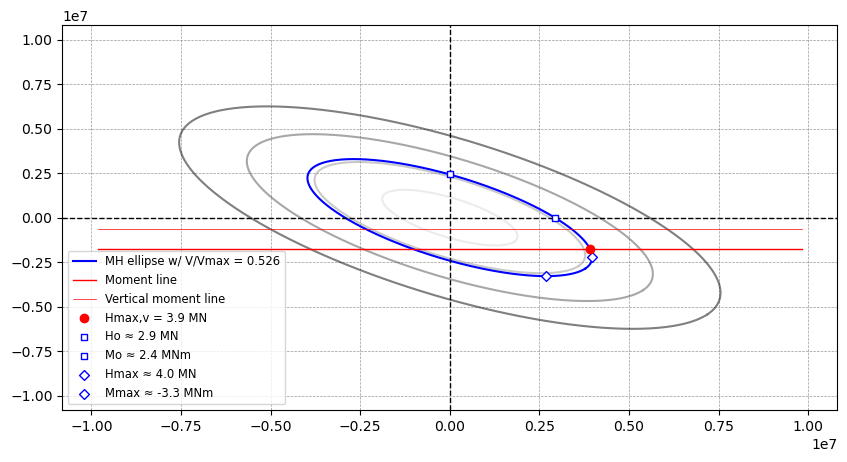

<Figure size 600x500 with 0 Axes>

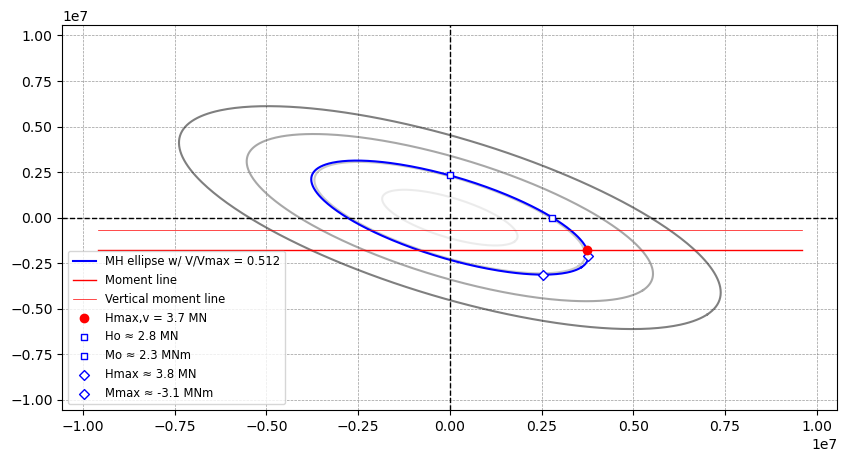

<Figure size 600x500 with 0 Axes>

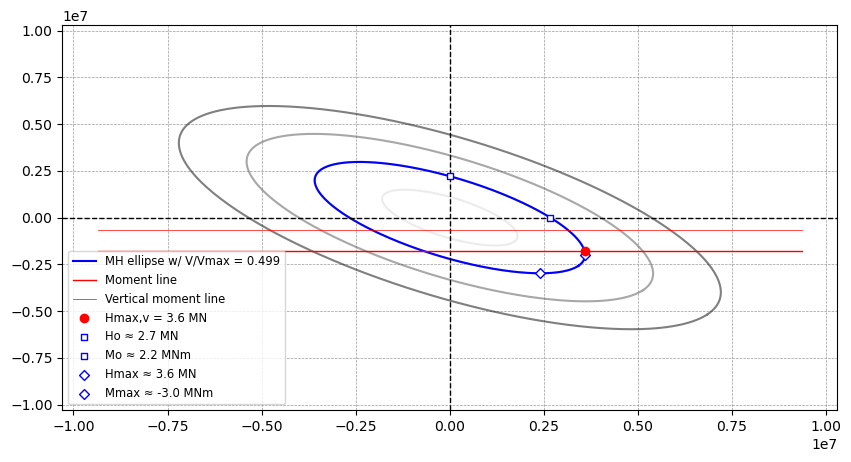

<Figure size 600x500 with 0 Axes>

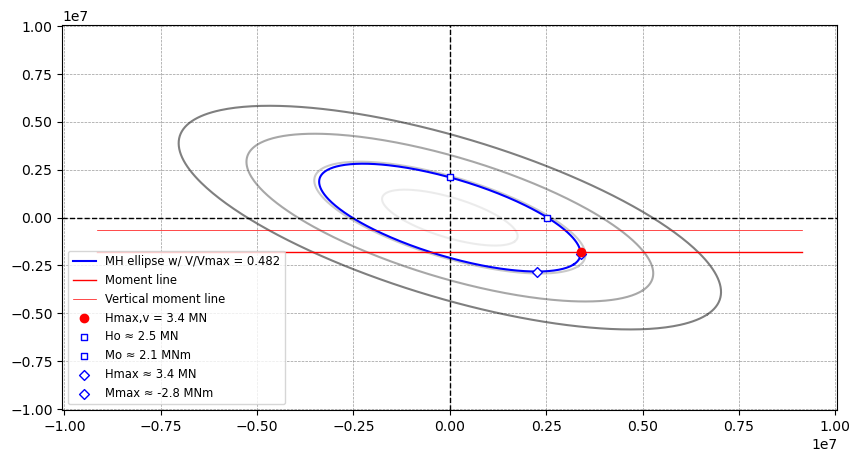

<Figure size 600x500 with 0 Axes>

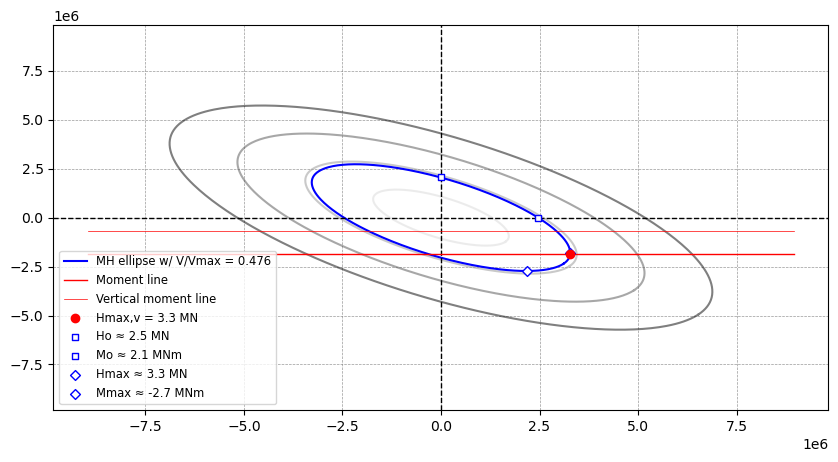

<Figure size 600x500 with 0 Axes>

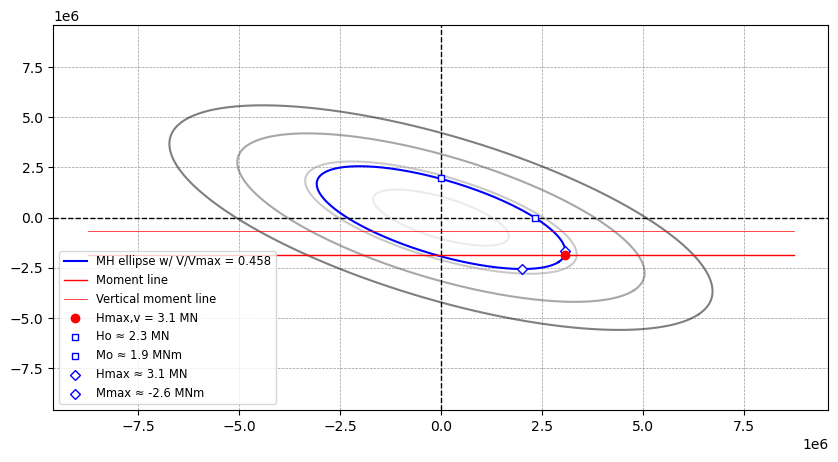

<Figure size 600x500 with 0 Axes>

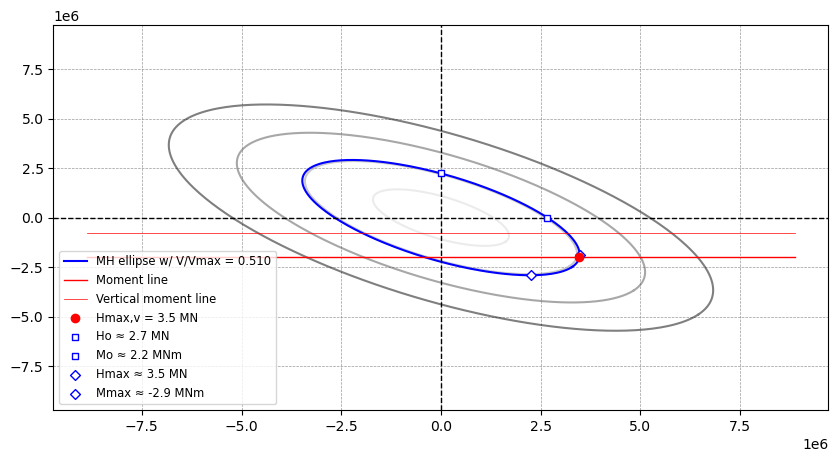

<Figure size 600x500 with 0 Axes>

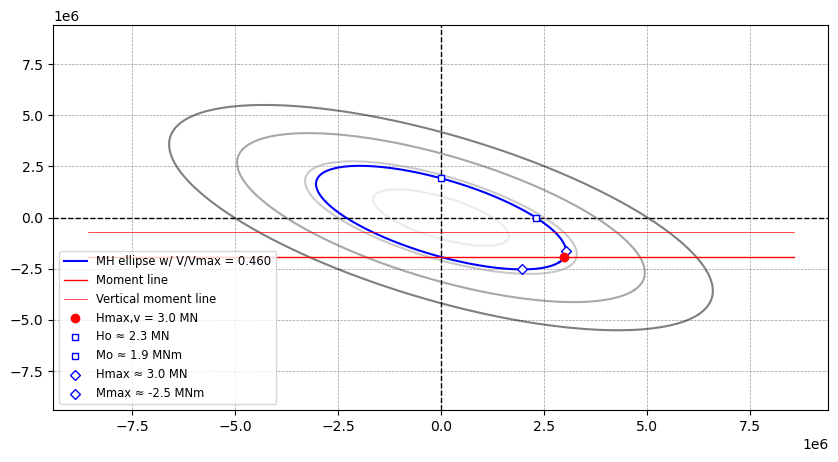

<Figure size 600x500 with 0 Axes>

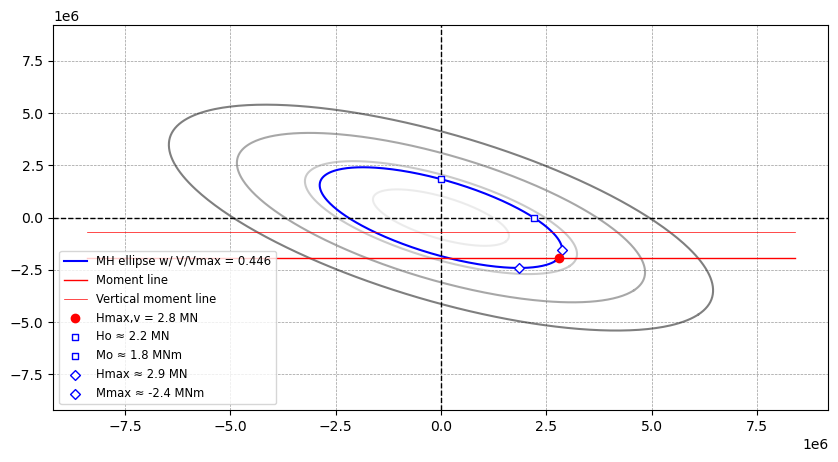

<Figure size 600x500 with 0 Axes>

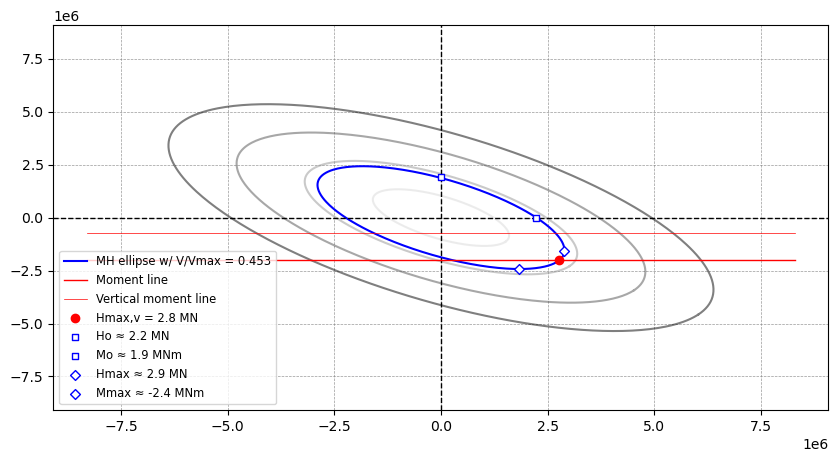

<Figure size 600x500 with 0 Axes>

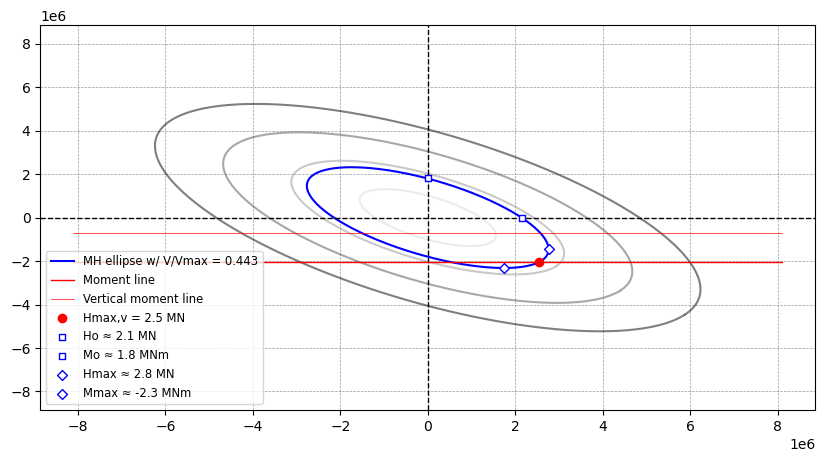

<Figure size 600x500 with 0 Axes>

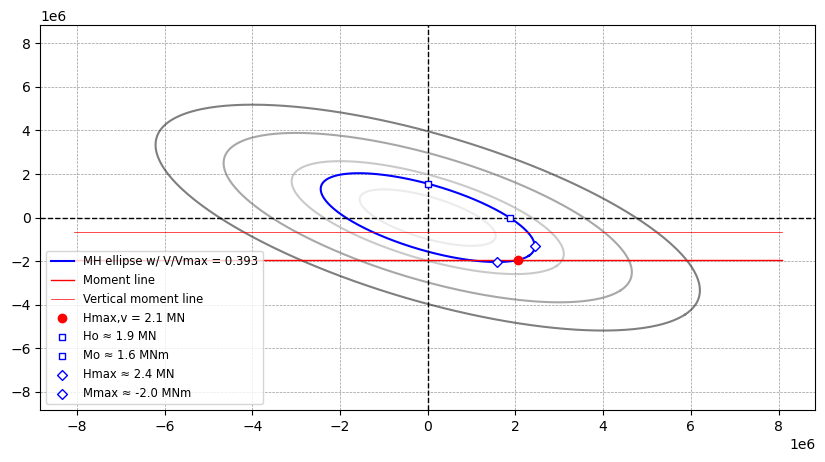

<Figure size 600x500 with 0 Axes>

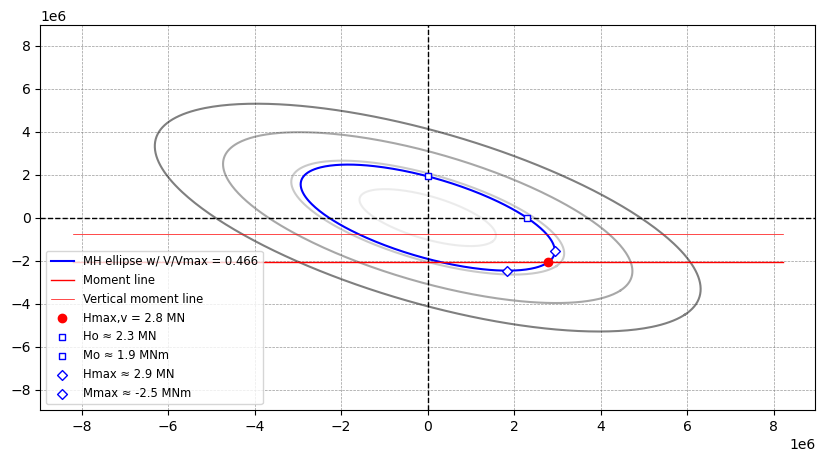

<Figure size 600x500 with 0 Axes>

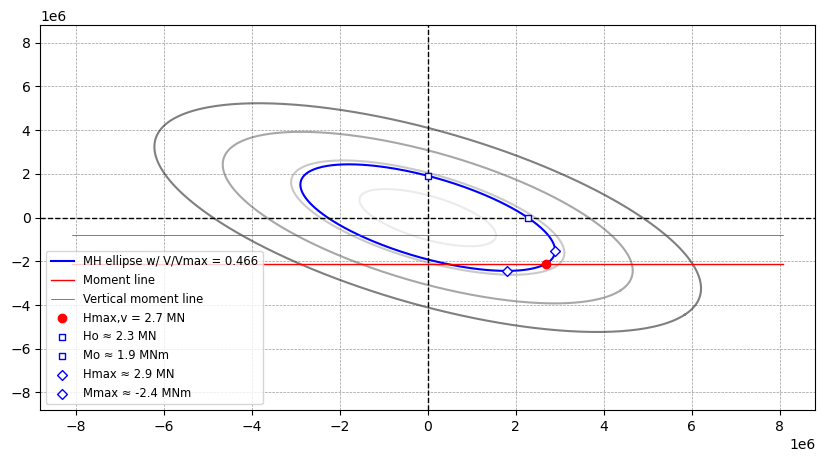

<Figure size 600x500 with 0 Axes>

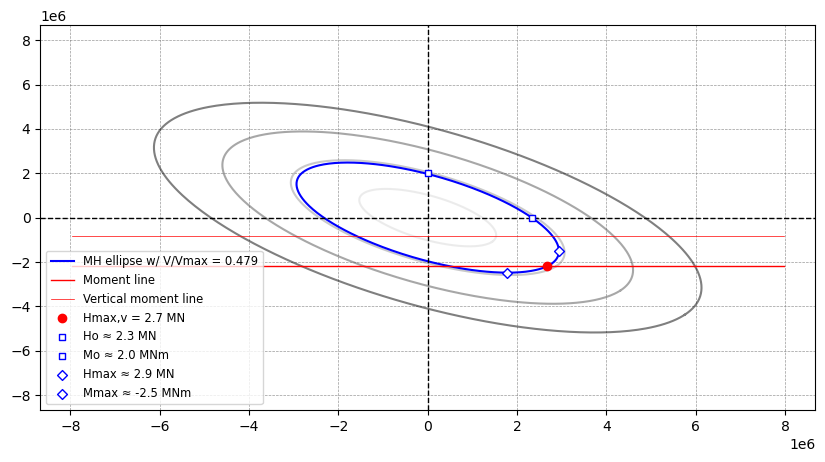

<Figure size 600x500 with 0 Axes>

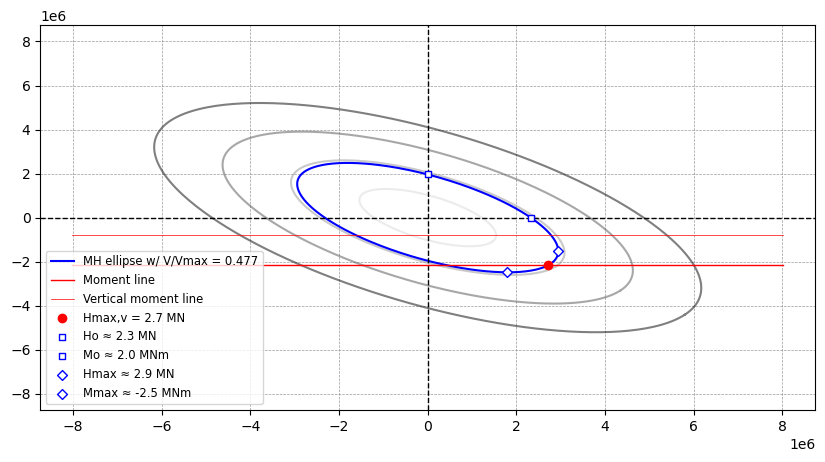

<Figure size 600x500 with 0 Axes>

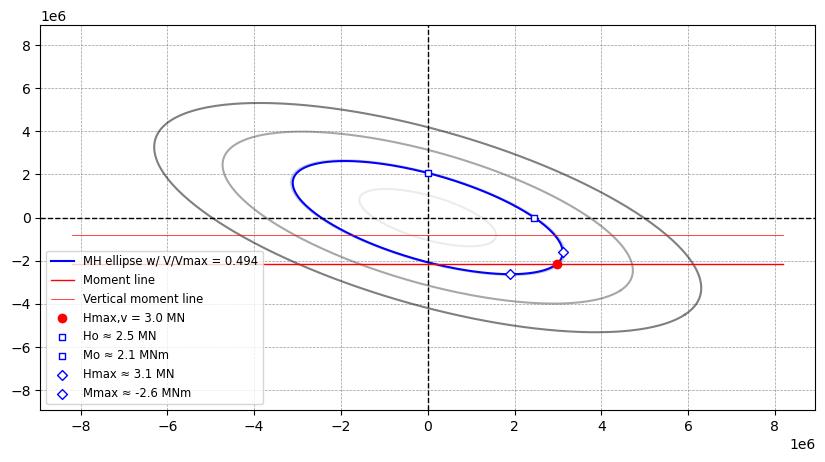

<Figure size 600x500 with 0 Axes>

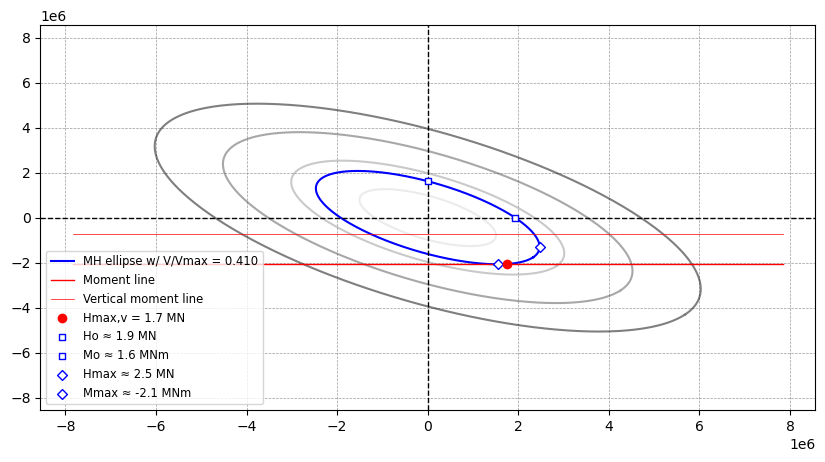

<Figure size 600x500 with 0 Axes>

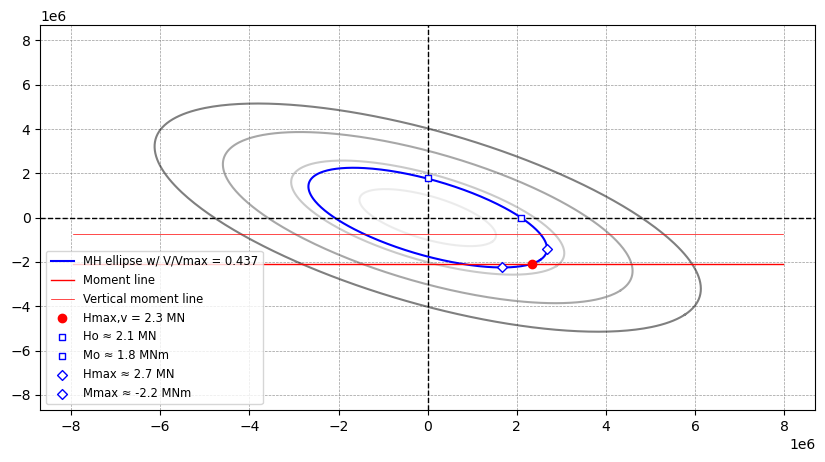

<Figure size 600x500 with 0 Axes>

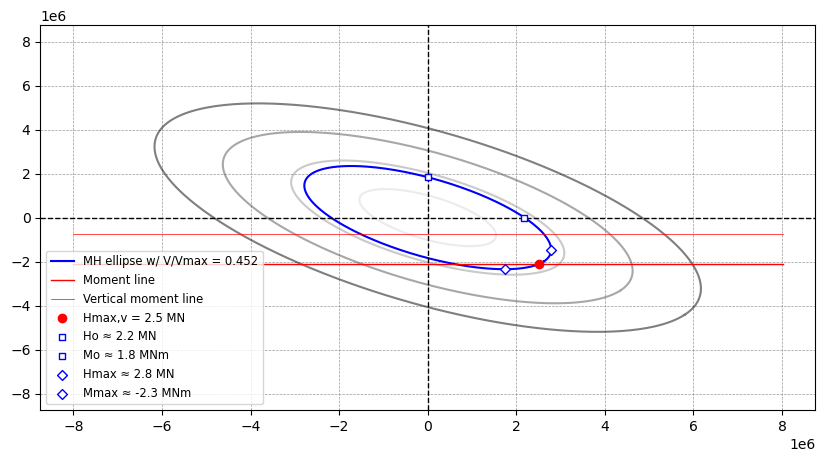

<Figure size 600x500 with 0 Axes>

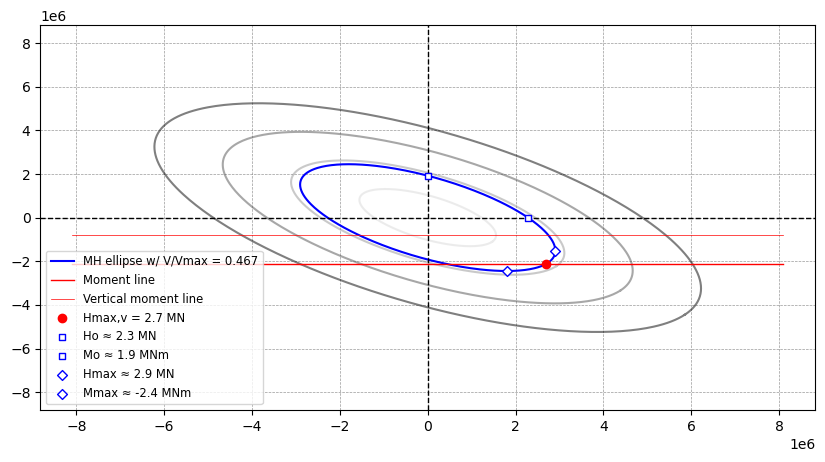

<Figure size 600x500 with 0 Axes>

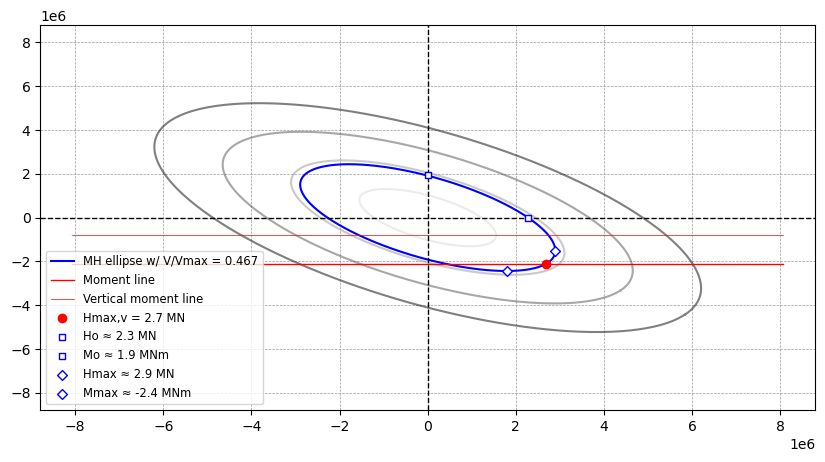

<Figure size 600x500 with 0 Axes>

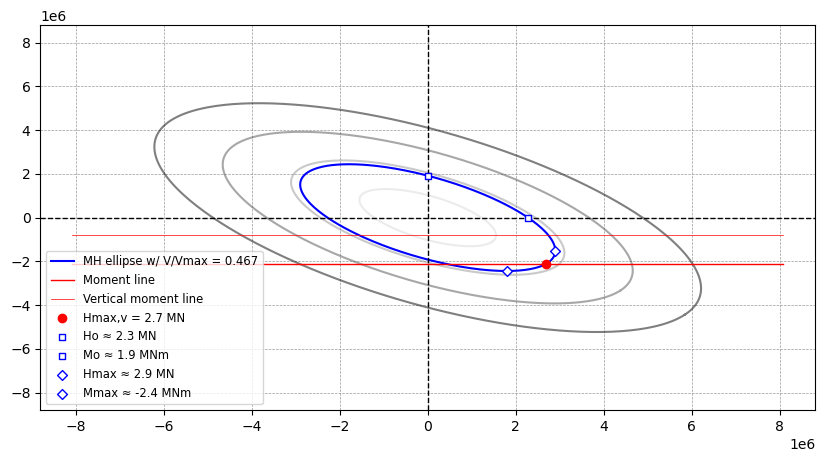

<Figure size 600x500 with 0 Axes>

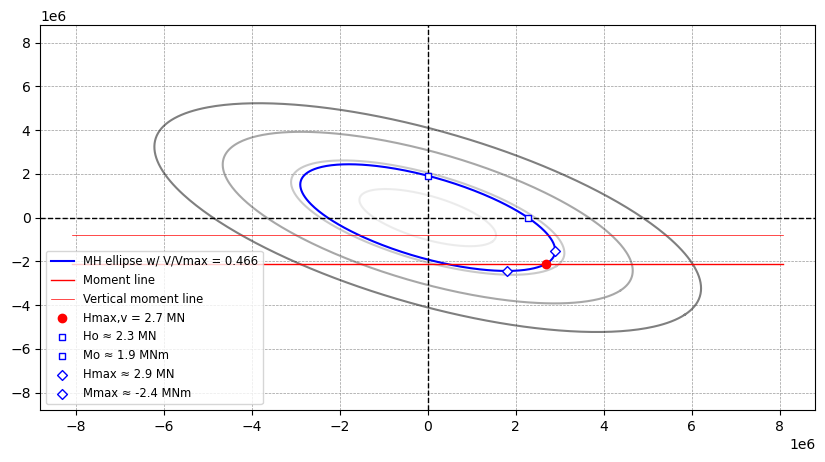

<Figure size 600x500 with 0 Axes>

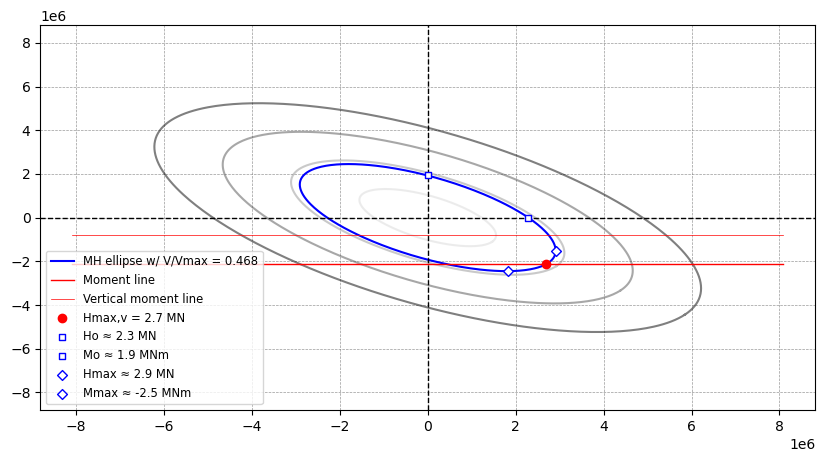

<Figure size 600x500 with 0 Axes>

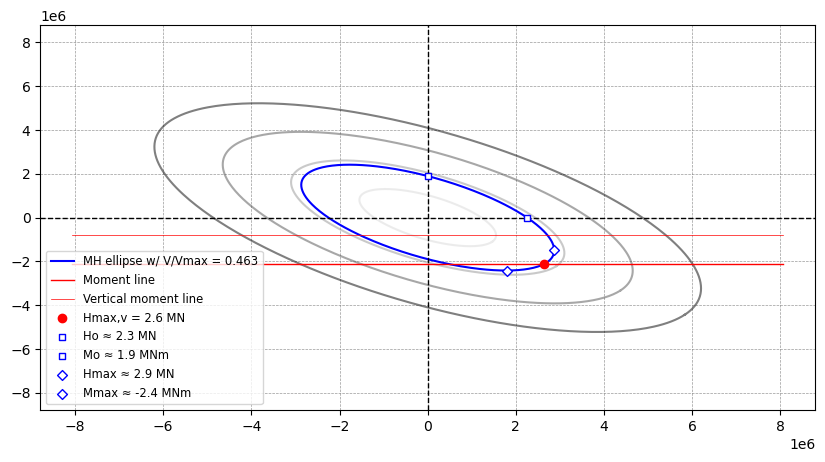

<Figure size 600x500 with 0 Axes>

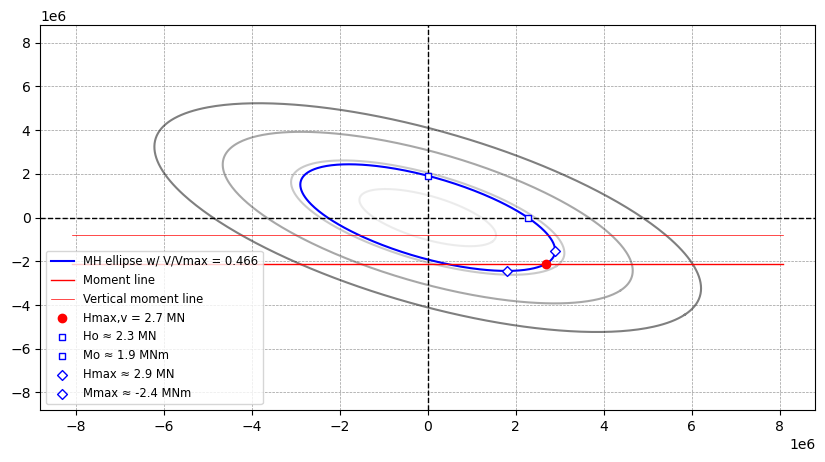

<Figure size 600x500 with 0 Axes>

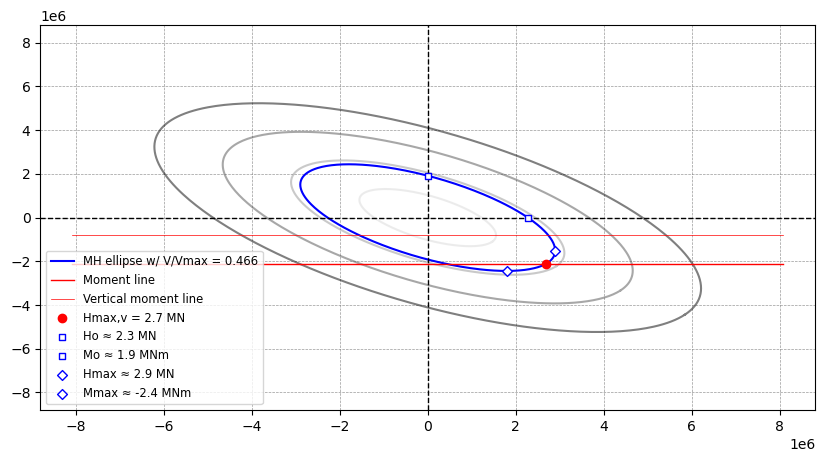

<Figure size 600x500 with 0 Axes>

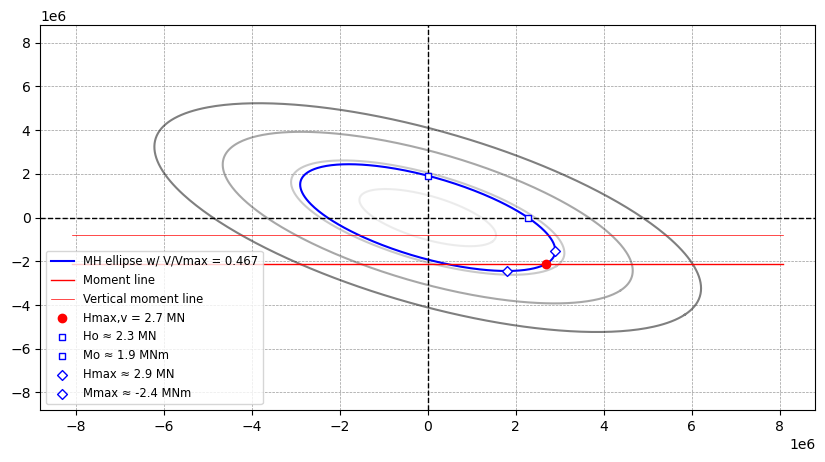

<Figure size 600x500 with 0 Axes>

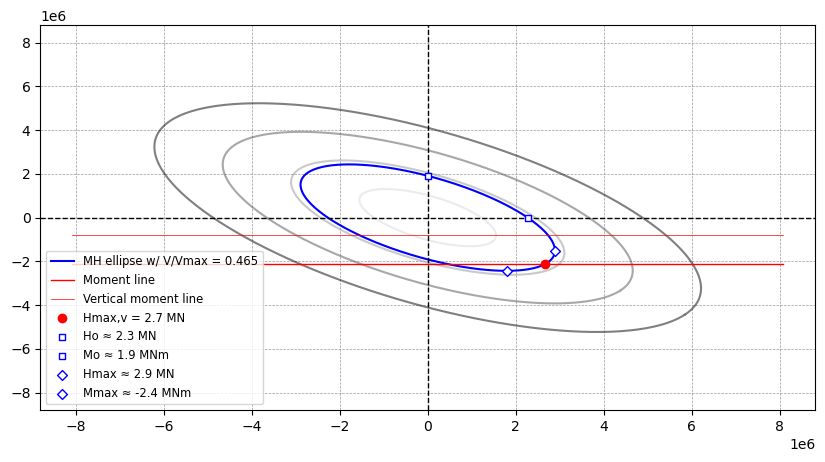

<Figure size 600x500 with 0 Axes>

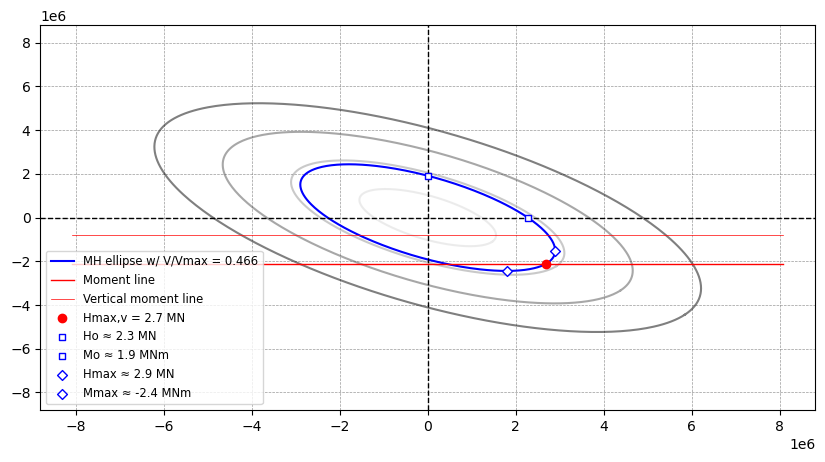

<Figure size 600x500 with 0 Axes>

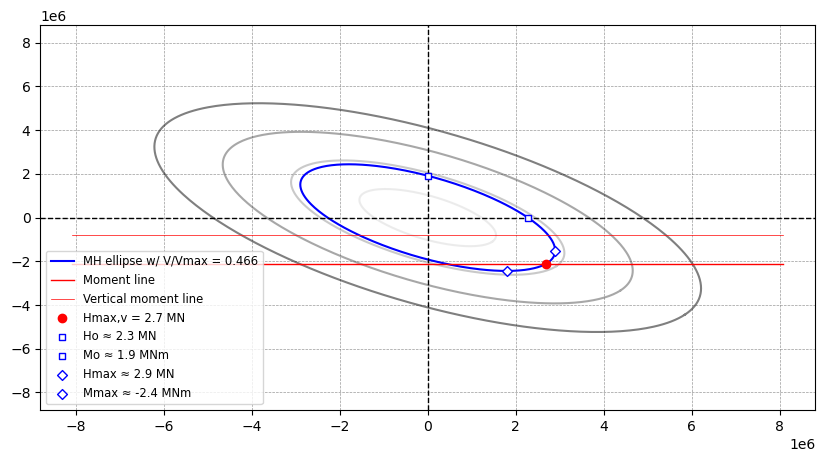

<Figure size 600x500 with 0 Axes>

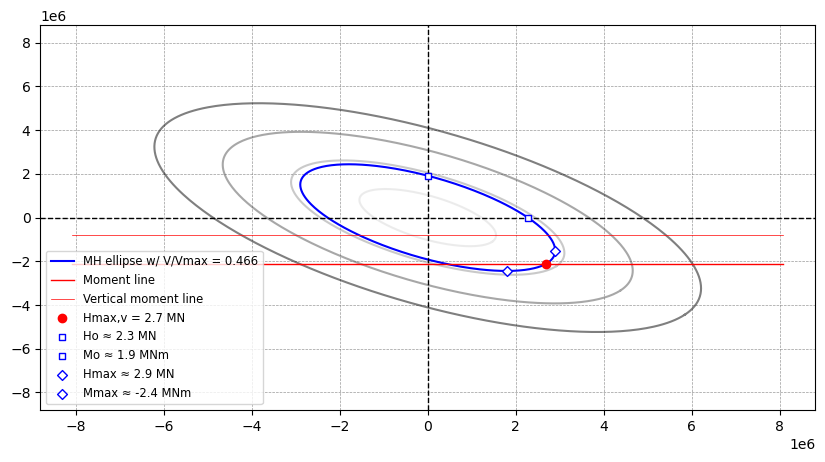

<Figure size 600x500 with 0 Axes>

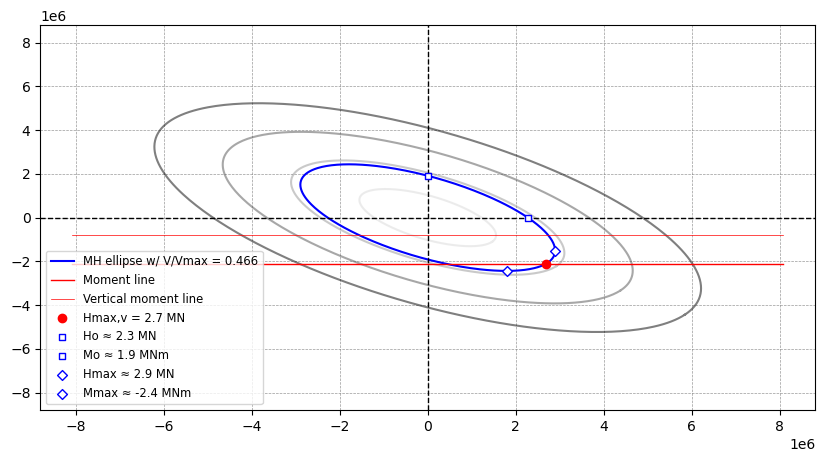

<Figure size 600x500 with 0 Axes>

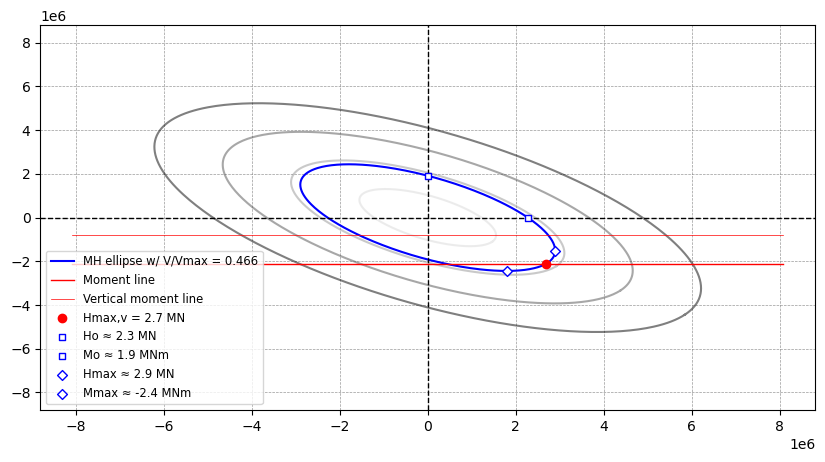

<Figure size 600x500 with 0 Axes>

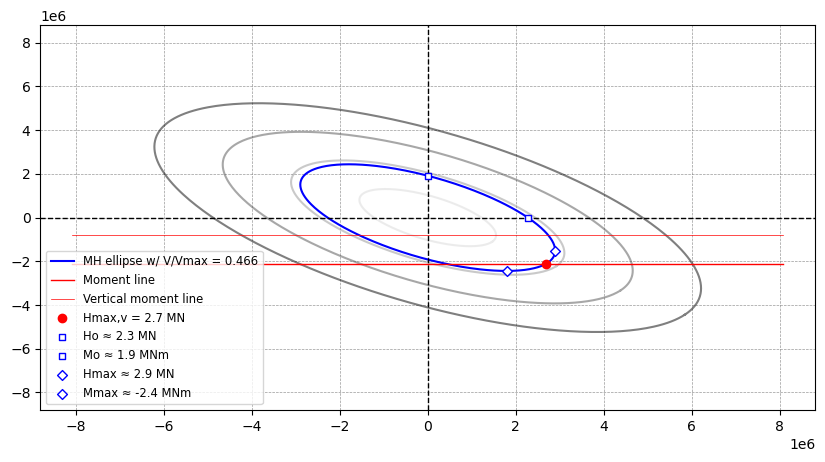

<Figure size 600x500 with 0 Axes>

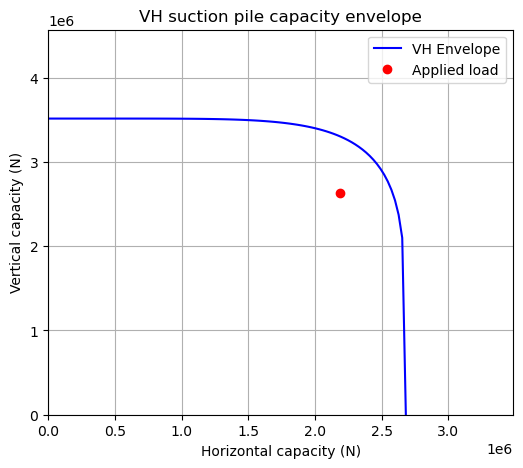


Final Optimized Anchor (UC-based):
Design: {'D': 1.8913237564654963, 'L': 11.099208044881985, 'zlug': 7.3994720299213235}
Capacity Results: {'Hmax': 2680903.350073319, 'Vmax': 3516302.6906043873, 'Ha': 2186977.238360048, 'Va': 2635582.2104549985, 'zlug': 7.3994720299213235, 'z0': 1.75, 'UC': 0.4999999981738827, 'Weight pile': 248933.05364646754}

Final Optimized Anchor:
Design: {'D': 1.8913237564654963, 'L': 11.099208044881985, 'zlug': 7.3994720299213235}
Capacity Results: {'Hmax': 2680903.350073319, 'Vmax': 3516302.6906043873, 'Ha': 2186977.238360048, 'Va': 2635582.2104549985, 'zlug': 7.3994720299213235, 'z0': 1.75, 'UC': 0.4999999981738827, 'Weight pile': 248933.05364646754}


In [ ]:
anchor.getSizeAnchor(
    geom = [anchor.dd['design']['L'], anchor.dd['design']['D']],
    geomKeys = ['L', 'D'],
    geomBounds = [(5.0, 15.0), (1.0, 4.0)],
    loads = None,
    lambdap_con = [3, 6],
    zlug_fix = False,
    safety_factor = {'SF_combined': 2},
    plot = True
)

print('\nFinal Optimized Anchor:')
print('Design:', anchor.dd['design'])
print('Capacity Results:', anchor.anchorCapacity)

### Step 11: Optimized anchor material costs
We assess the cost of the optimized suction pile defined by the manufacturing cost (USD/kg)

In [ ]:
anchor.getCostAnchor2()

print(f"Mass: {anchor.anchorCapacity['Weight pile']/9.81:.2f} kg")
print(f"Material unit cost: {anchor.cost['unit_cost']:.2f} USD/kg")
print(f'Material cost: {anchor.cost["Material cost"]:.2f} USD [2024]')

{'name': 'no_name', 'Anchors': True, 'Buoys': False, 'Connections': False, 'anchor_list': [{'name': 'suction', 'num': 1, 'frac': 1.0}], 'aprops': {'suction': {'matcost_m': 10.25, 'matcost_m2': 0.0, 'matcost_m3': 0.0, 'matcost_a': 0.0, 'matcost_a2': 0.0, 'matcost_a3': 0.0, 'matcost': 0.0, 'instcost_m': 0.0, 'instcost_m2': 0.0, 'instcost_m3': 0.0, 'instcost_a': 0.0, 'instcost_a2': 0.0, 'instcost_a3': 0.0, 'instcost': 0.0, 'decomcost_m': 0.0, 'decomcost_m2': 0.0, 'decomcost_m3': 0.0, 'decomcost_a': 0.0, 'decomcost_a2': 0.0, 'decomcost_a3': 0.0, 'decomcost': 0.0}}, 'buoy_cost': {'cost_b0': 0.0, 'cost_b1': 0.0, 'cost_b2': 0.0, 'cost_b3': 0.0}, 'connector_cost': {'cost_load0': 0.0, 'cost_load1': 0.0, 'cost_load2': 0.0, 'cost_load3': 0.0}, 'FOS': 0.0, 'info': {}}
Mass: 25375.44 kg
Material unit cost: 10.25 USD/kg
Material cost: 260098.25 USD [2024]
